# Import Necessary Packages

In [ ]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

# Import Data

In [ ]:
Cars=pd.read_excel('drive/MyDrive/Colab Notebooks/Stats and ML datasets/EDA Cars.xlsx')
Cars.head(10)

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0
5,6,NaN,NaN,F,High School,Home Maker,48.360191,NaN,6000.0,SUV,5.0,Texas,42420.0
6,7,87460.05269,No,M,High School,Manager,45.000488,NaN,15420.0,Minivan,1.0,Texas,42420.0
7,8,NaN,Yes,F,High School,Blue Collar,15.665947,NaN,11290.0,Sports Car,1.0,Texas,NaN
8,9,NaN,NaN,F,NaN,Clerical,26.392961,NaN,10030.0,SUV,1.0,Texas,42420.0
9,10,NaN,Yes,M,High School,Blue Collar,27.490749,NaN,NaN,Panel Truck,NaN,Texas,42420.0


In [ ]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           303 non-null    int64  
 1   INCOME          260 non-null    float64
 2   MARITAL STATUS  275 non-null    object 
 3   SEX             297 non-null    object 
 4   EDUCATION       259 non-null    object 
 5   JOB             257 non-null    object 
 6   TRAVEL TIME     262 non-null    float64
 7   USE             250 non-null    object 
 8   MILES CLOCKED   278 non-null    float64
 9   CAR TYPE        293 non-null    object 
 10  CAR AGE         283 non-null    float64
 11  CITY            297 non-null    object 
 12  POSTAL CODE     300 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 30.9+ KB


# Data Preprocessing

In [ ]:
## 1. Handling Missing Values
Cars.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

In [ ]:
Cars.select_dtypes(include='object').columns

Index(['MARITAL STATUS', 'SEX', 'EDUCATION', 'JOB', 'USE', 'CAR TYPE', 'CITY'], dtype='object')

In [ ]:
## Missing Value Treatment for Categorical Columns. We are using mode to fill missing values
Cars['MARITAL STATUS']=Cars['MARITAL STATUS'].fillna(Cars['MARITAL STATUS'].mode()[0])
Cars['SEX']=Cars['SEX'].fillna(Cars['SEX'].mode()[0])
Cars['EDUCATION']=Cars['EDUCATION'].fillna(Cars['EDUCATION'].mode()[0])
Cars['JOB']=Cars['JOB'].fillna(Cars['JOB'].mode()[0])
Cars['USE']=Cars['USE'].fillna(Cars['USE'].mode()[0])
Cars['CAR TYPE']=Cars['CAR TYPE'].fillna(Cars['CAR TYPE'].mode()[0])
Cars['CITY']=Cars['CITY'].fillna(Cars['CITY'].mode()[0])

In [ ]:
## Missing Value Treament for Numerical Columns
Cars.select_dtypes(exclude='object').columns

Index(['INDEX', 'INCOME', 'TRAVEL TIME', 'MILES CLOCKED', 'CAR AGE',
       'POSTAL CODE'],
      dtype='object')

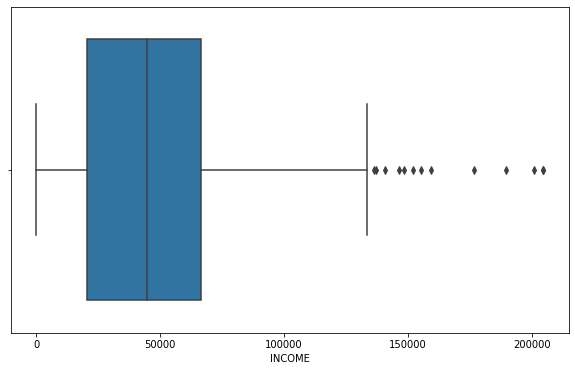

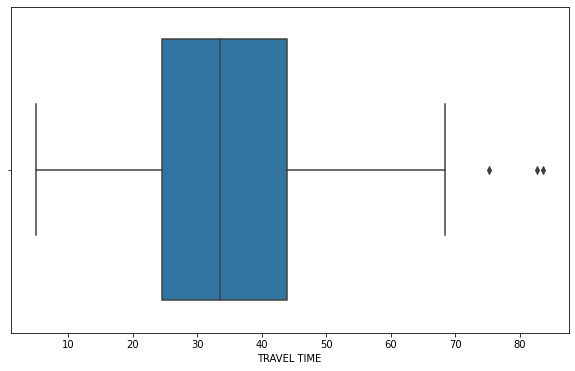

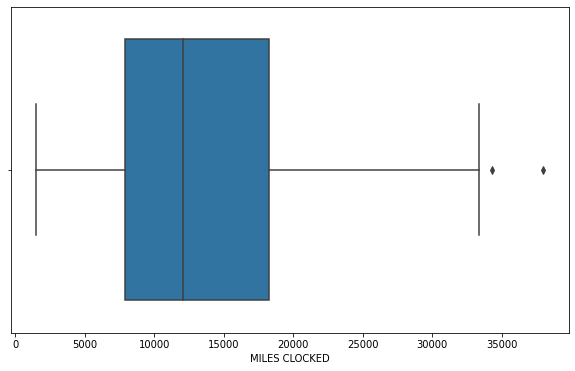

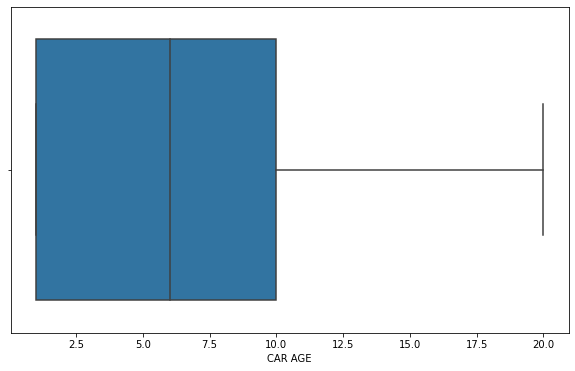

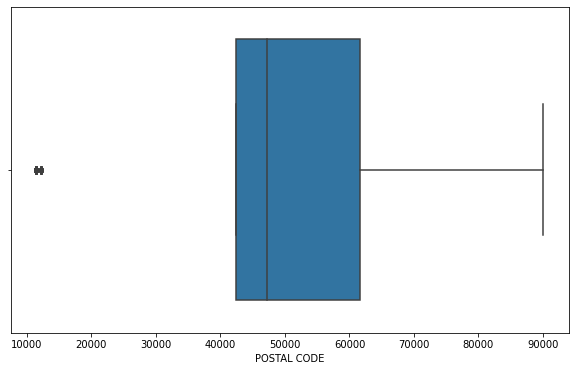

In [ ]:
## We will check whether outlier is present in Numerical Columns or not, for that we will be plotting Boxplots for respective columns

def boxplots(col):
  plt.figure(figsize=(10,6))
  sns.boxplot(Cars[col])
  plt.show()


for i in list(Cars.select_dtypes(exclude='object').columns[1:]):
  boxplots(i)

In [ ]:
## From above boxplots, we observed that outliers are present except Age column so to filling missing values in those columns we are using median

Cars['INCOME']=Cars['INCOME'].fillna(Cars['INCOME'].median())
Cars['TRAVEL TIME']=Cars['TRAVEL TIME'].fillna(Cars['TRAVEL TIME'].median())
Cars['MILES CLOCKED']=Cars['MILES CLOCKED'].fillna(Cars['MILES CLOCKED'].median())
Cars['CAR AGE']=Cars['CAR AGE'].fillna(Cars['CAR AGE'].mean())


In [ ]:
## Drop Unnecessary Columns
Cars.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,Blue Collar,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,No,F,Bachelors,Clerical,33.639949,Private,12065.0,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,High School,Lawyer,15.415676,Private,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,Blue Collar,33.564757,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [ ]:
Cars.drop(columns=['INDEX','POSTAL CODE'],axis=1,inplace=True)

In [ ]:
Cars.head()

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY
0,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas
1,50815.44531,No,M,High School,Blue Collar,20.591628,Private,18930.0,Minivan,1.0,Texas
2,62977.82416,No,F,Bachelors,Clerical,33.639949,Private,12065.0,SUV,1.0,Texas
3,77099.96624,No,F,High School,Lawyer,15.415676,Private,18300.0,Sports Car,11.0,Texas
4,130794.57420,No,M,High School,Blue Collar,33.564757,Commercial,28340.0,Panel Truck,10.0,Texas


In [ ]:
Cars.isnull().sum()

INCOME            0
MARITAL STATUS    0
SEX               0
EDUCATION         0
JOB               0
TRAVEL TIME       0
USE               0
MILES CLOCKED     0
CAR TYPE          0
CAR AGE           0
CITY              0
dtype: int64

In [ ]:
## 2. Encoding
Cars.select_dtypes(include='object').columns

Index(['MARITAL STATUS', 'SEX', 'EDUCATION', 'JOB', 'USE', 'CAR TYPE', 'CITY'], dtype='object')

In [ ]:
print(Cars['MARITAL STATUS'].unique())
print('*****************************')
print(Cars['SEX'].unique())
print('*****************************')
print(Cars['EDUCATION'].unique())
print('*****************************')
print(Cars['JOB'].unique())
print('*****************************')
print(Cars['USE'].unique())
print('*****************************')
print(Cars['CAR TYPE'].unique())
print('*****************************')
print(Cars['CITY'].unique())
print('*****************************')

['No' 'Yes']
*****************************
['F' 'M']
*****************************
['Bachelors' 'High School' 'Masters' 'PhD']
*****************************
['Blue Collar' 'Clerical' 'Lawyer' 'Home Maker' 'Manager' 'Professional'
 'Student' 'Doctor']
*****************************
['Commercial' 'Private']
*****************************
['Sports Car' 'Minivan' 'SUV' 'Panel Truck' 'Pickup' 'Van']
*****************************
['Texas' 'Houston' 'Philadelphia' 'Los Angeles' 'New Albany'
 'New York City' 'San Francisco' 'Seattle' 'Columbia' 'Washington'
 'Las Vegas']
*****************************


In [ ]:
## There are 3 columns (Marital Status,Sex,Use) contain only binary values, so we will use Label Encoding for this columns

## Label Encoding of Marital Status column
Cars['MARITAL STATUS']=Cars['MARITAL STATUS'].astype('category')
Cars['MARITAL STATUS']=Cars['MARITAL STATUS'].cat.codes

## Label Encoding of SEX column
Cars['SEX']=Cars['SEX'].astype('category')
Cars['SEX']=Cars['SEX'].cat.codes

## Label Encoding of USE column
Cars['USE']=Cars['USE'].astype('category')
Cars['USE']=Cars['USE'].cat.codes

In [ ]:
## For rest of the categorical columns we are using One Hot Encoding

Cars=pd.get_dummies(Cars,columns=['EDUCATION','JOB','CAR TYPE','CITY'])
Cars.head()

,INCOME,MARITAL STATUS,SEX,TRAVEL TIME,USE,MILES CLOCKED,CAR AGE,EDUCATION_Bachelors,EDUCATION_High School,EDUCATION_Masters,...,CITY_Houston,CITY_Las Vegas,CITY_Los Angeles,CITY_New Albany,CITY_New York City,CITY_Philadelphia,CITY_San Francisco,CITY_Seattle,CITY_Texas,CITY_Washington
0,125301.24250,0,0,45.703013,0,17430.0,7.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50815.44531,0,1,20.591628,1,18930.0,1.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,62977.82416,0,0,33.639949,1,12065.0,1.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,77099.96624,0,0,15.415676,1,18300.0,11.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,130794.57420,0,1,33.564757,0,28340.0,10.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
Cars.columns

Index(['INCOME', 'MARITAL STATUS', 'SEX', 'TRAVEL TIME', 'USE',
       'MILES CLOCKED', 'CAR AGE', 'EDUCATION_Bachelors',
       'EDUCATION_High School', 'EDUCATION_Masters', 'EDUCATION_PhD',
       'JOB_Blue Collar', 'JOB_Clerical', 'JOB_Doctor', 'JOB_Home Maker',
       'JOB_Lawyer', 'JOB_Manager', 'JOB_Professional', 'JOB_Student',
       'CAR TYPE_Minivan', 'CAR TYPE_Panel Truck', 'CAR TYPE_Pickup',
       'CAR TYPE_SUV', 'CAR TYPE_Sports Car', 'CAR TYPE_Van', 'CITY_Columbia',
       'CITY_Houston', 'CITY_Las Vegas', 'CITY_Los Angeles', 'CITY_New Albany',
       'CITY_New York City', 'CITY_Philadelphia', 'CITY_San Francisco',
       'CITY_Seattle', 'CITY_Texas', 'CITY_Washington'],
      dtype='object')

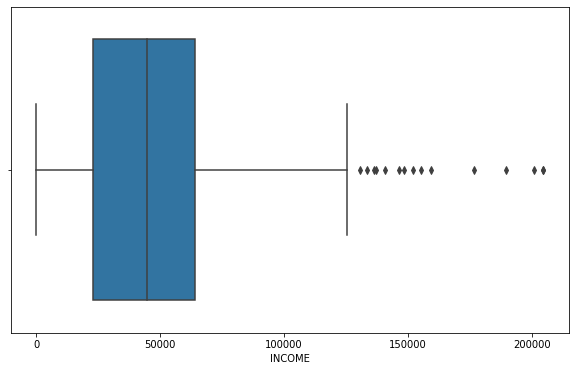

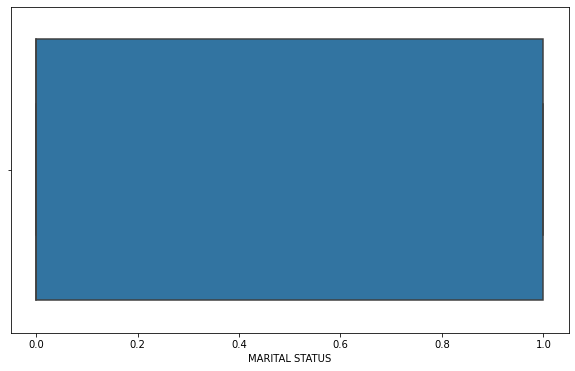

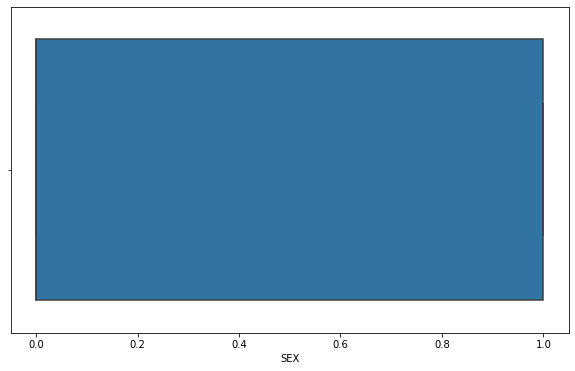

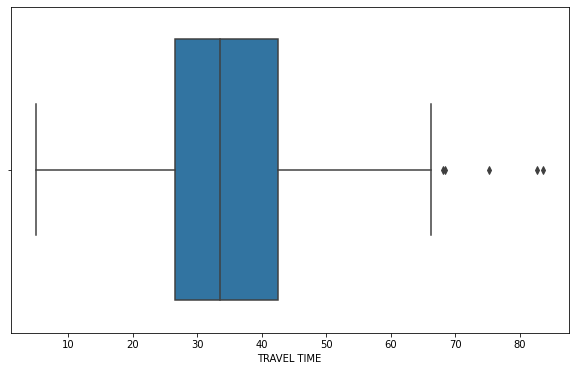

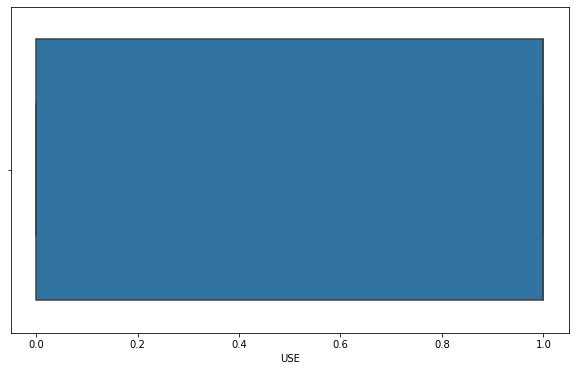

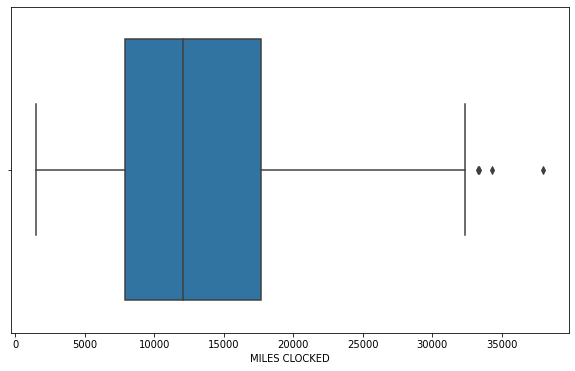

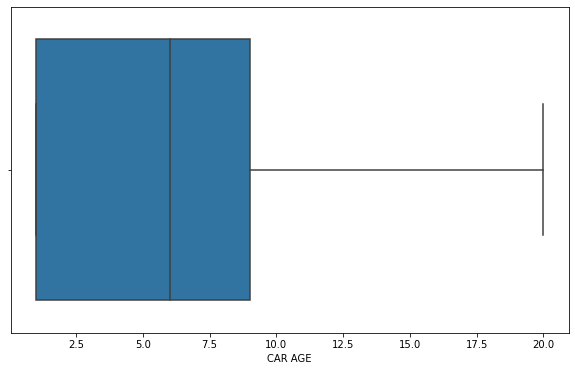

In [ ]:
## 3. Outlier Treatment of Numerical Columns

def boxplots(col):
  plt.figure(figsize=(10,6))
  sns.boxplot(Cars[col])
  plt.show()


for i in list(Cars.select_dtypes(exclude='object').columns[0:7]):
  boxplots(i)

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  Lower_Range=Q1-(1.5*IQR)
  Upper_Range=Q3+(1.5*IQR)
  return Lower_Range,Upper_Range

In [ ]:
for i in list(Cars.select_dtypes(exclude='object').columns):
    Lr_Value,Up_Value=remove_outlier(Cars[i])
    Cars[i]=np.where(Cars[i]<Lr_Value,Lr_Value,Cars[i])
    Cars[i]=np.where(Cars[i]>Up_Value,Up_Value,Cars[i])



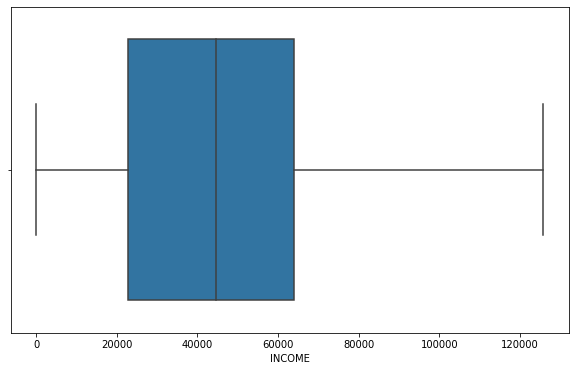

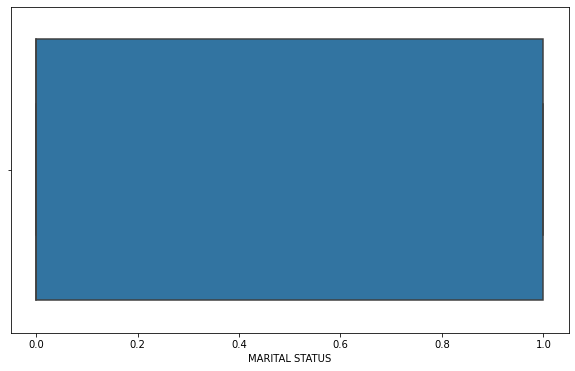

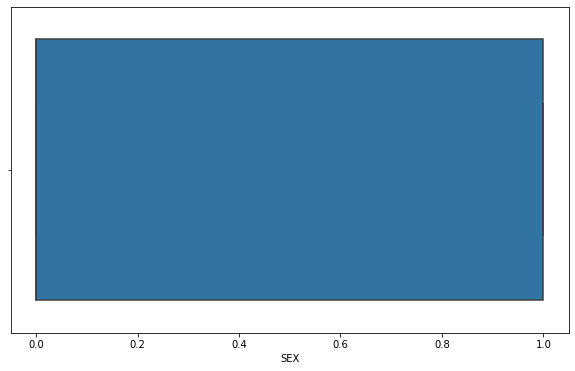

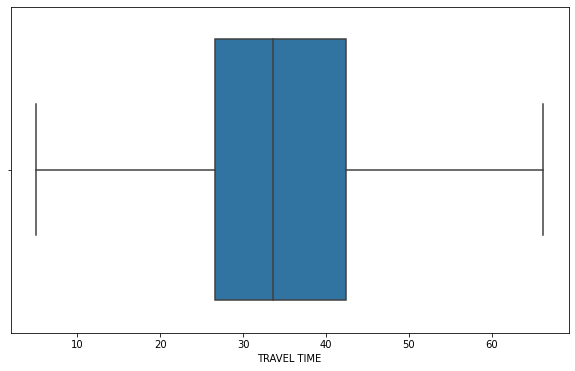

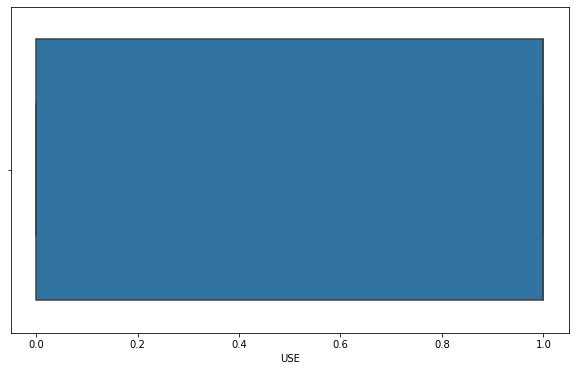

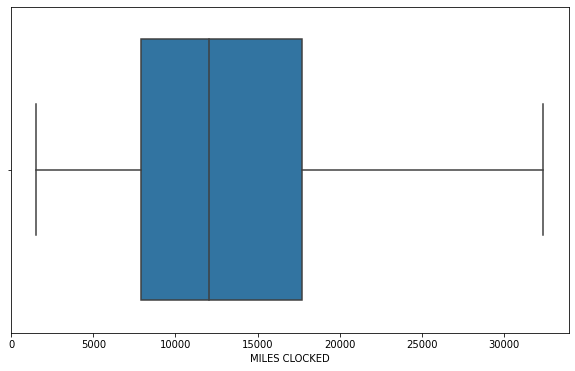

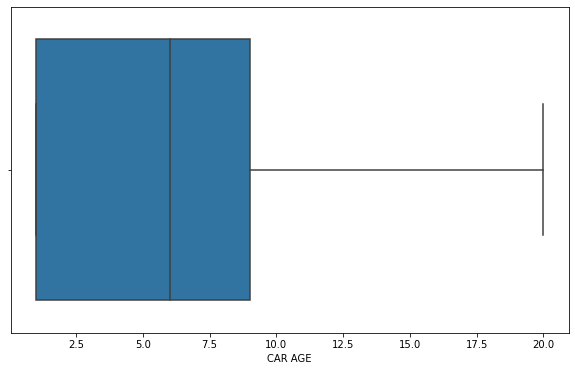

In [ ]:
def boxplots(col):
  plt.figure(figsize=(10,6))
  sns.boxplot(Cars[col])
  plt.show()


for i in list(Cars.select_dtypes(exclude='object').columns[0:7]):
  boxplots(i)

In [ ]:
Cars1=Cars.copy()

In [ ]:
## 4. Feature Scaling

from sklearn.preprocessing import Normalizer
Nor=Normalizer()
FS_Cars1=Nor.fit_transform(Cars1)

In [ ]:
FS_Cars1

array([[9.90463050e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.37089553e-01, 0.00000000e+00, 1.84410379e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.82139450e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.85551298e-01, 0.00000000e+00, 2.21116473e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.15779505e-01, 2.05462602e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.01504396e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])